<a href="https://colab.research.google.com/github/AndreyDyachkov/Data_analytics_with_Python/blob/main/07_online_sales_ab_testing/Data_driven_decision_making_Prioritization_of_hypotheses_AB_tests_(Yandex).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data-driven decision making. Prioritization of hypotheses. AB tests.

<b>Task:</b>
Prioritize hypotheses for increasing revenue of a large online store, run A/B tests and analyze the results.
<br>
<b>Data description: </b><br>
Data for the first part
1. hypothesis.csv - 9 hypotheses to increase revenue
    - Hypothesis — a brief description of the hypothesis;
    - Reach - coverage of users on a 10-point scale;
    - Impact - impact on users on a 10-point scale;
    - Confidence - confidence in the hypothesis on a 10-point scale;
    - Efforts - the cost of resources to test the hypothesis on a 10-point scale. The larger the Efforts value, the more expensive it is to test the hypothesis.
<br>

Data for the second part
1. orders.csv
    - transactionId — order identifier;
    - visitorId — identifier of the user who made the order;
    - date — date when the order was made;
    - revenue — order revenue;
    - group — the A/B test group that the order belongs to.
2.visitors.csv.
    - date — date;
    - group — A/B test group;
    - visitors — number of users on the specified date in the specified A/B test group

## Part 1. Prioritization of hypotheses

### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
hypothesis = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Y_Praktikum/data/hypothesis.csv')
pd.set_option('display.max_colwidth', None)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Let's look at the description statistics

In [5]:
hypothesis.describe()

,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


The spread is from 1 to 10, except Confidence (1-9).

### Prioritization of hypotheses

#### Applying the ICE framework. Sort by descending priority.

In [6]:
hypothesis['ice_score'] = (hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(2)
hypothesis[['Hypothesis','ice_score']].sort_values(by='ice_score', ascending=False)

,Hypothesis,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


<b>Conclusion:</b> According to the ICE framework, we need to start with the hypothesis "Запустить акцию, дающую скидку на товар в день рождения" ("Launch a promotion that gives a discount on a product on client's birthday"

#### Applying the RICE framework. Sort by descending priority.

In [7]:
hypothesis['rice_score'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(2)
hypothesis[['Hypothesis','rice_score']].sort_values(by='rice_score', ascending=False)

,Hypothesis,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


<b>Conclusion:</b> According to the RICE framework, we need to start with the hypothesis "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" ("Add a subscription form to all main pages to build a customer base for email newsletters")

According to RICE, the hypothesis “Add a subscription form to all main pages to collect a customer base for email newsletters” came out on top, while the hypothesis: “Launch a promotion that gives a discount on goods on a birthday” dropped to 5th place. This was due to a difference in the reach criterion

### Part 1 Conclusion

The hypotheses were prioritized using two methods ICE and RICE. According to ICE, the highest priority hypothesis is: "Run a promotion that gives a discount on a product on a birthday." According to the RICE framework due to the maximum reach score: "Add a subscription form to all main pages to collect a customer base for email newsletters."
Because coverage is important for us, we need to start with a hypothesis: "Add a subscription form to all main pages in order to collect a customer base for email newsletters"

It could also be noted that the top 5 hypotheses for both frameworks is the same

## Part 2. A/B-test

### Stage 1. Getting data

In [8]:
visitors = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Y_Praktikum/data/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
orders = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Y_Praktikum/data/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


#### Checking for duplicates, missing values and wrong data types.

In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
visitors.duplicated().sum()

0

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [13]:
orders.duplicated().sum()

0

Let's check the correctness of the distribution of users into groups. Ideally, there should be no users who fall into both groups. So if there are such clients, then they have two unique group names.

In [14]:
orders.groupby('visitorId')['group'].nunique().value_counts()

1    973
2     58
Name: group, dtype: int64

<b>Results:</b><br>
There are no missing values or duplicates. There are 58 users who are assigned to both groups of the A/B test. This is probably a mistake, but we will not exclude them, as this will reduce the conversion, as we cannot exclude them from visits. All dates are of type string. Let's change to datetime.

In [15]:
visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

#### EDA

In [16]:
visitors.describe()

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


Distribution

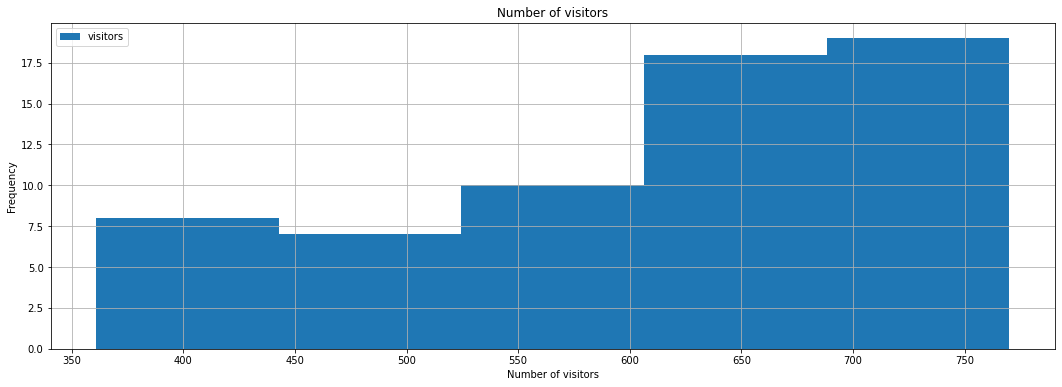

In [17]:
visitors.plot(kind='hist', y='visitors', bins=5, grid=True, figsize=(18,6), title='Number of visitors')
plt.xlabel('Number of visitors')
plt.ylabel('Frequency')
plt.show()

We have a left skewed distribution

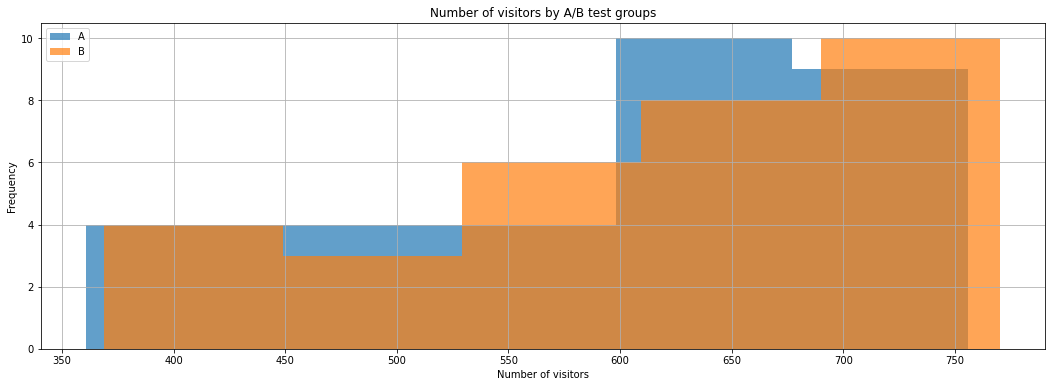

In [18]:
plt.figure(figsize=(18, 6))
plt.title('Number of visitors by A/B test groups')
plt.grid(True)
plt.hist(visitors[visitors['group']=='A']['visitors'], label = 'A', bins=5, alpha=0.7)
plt.hist(visitors[visitors['group']=='B']['visitors'], label = 'B', bins=5, alpha=0.7)
plt.legend()
plt.xlabel('Number of visitors')
plt.ylabel('Frequency')
plt.show()

The distributions are similar in both groups.

In [19]:
visitors['date'].describe(datetime_is_numeric=True)

count                     62
mean     2019-08-16 00:00:00
min      2019-08-01 00:00:00
25%      2019-08-08 06:00:00
50%      2019-08-16 00:00:00
75%      2019-08-23 18:00:00
max      2019-08-31 00:00:00
Name: date, dtype: object

In [20]:
orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


Let's look at the distribution of revenue

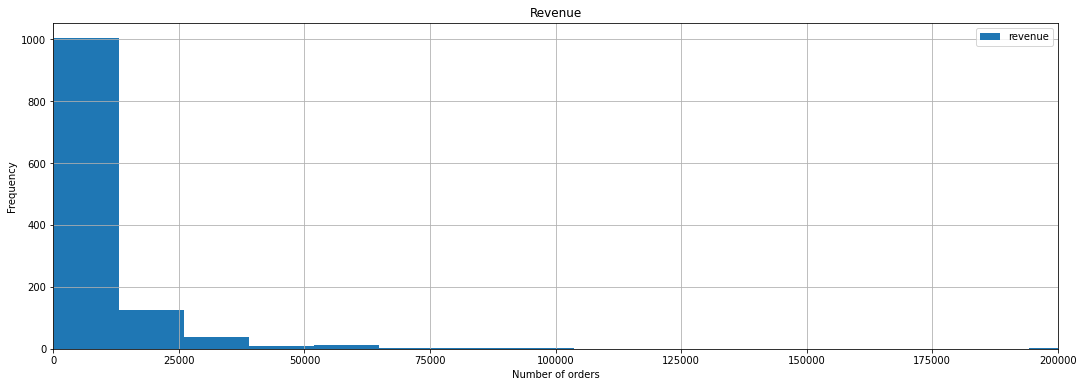

In [21]:
orders.plot(kind='hist', y='revenue', bins=100, grid=True, figsize=(18,6), title='Revenue', xlim=(0,200000))
plt.xlabel('Number of orders')
plt.ylabel('Frequency')
plt.show()

There are outliers, let's check on a boxplot

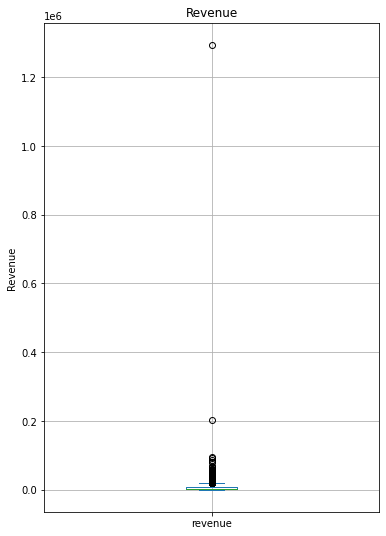

In [22]:
orders.plot(kind='box', y='revenue', grid=True, figsize=(6,9), title='Revenue')
plt.ylabel('Revenue')
plt.show()

Let's build boxplots for each group

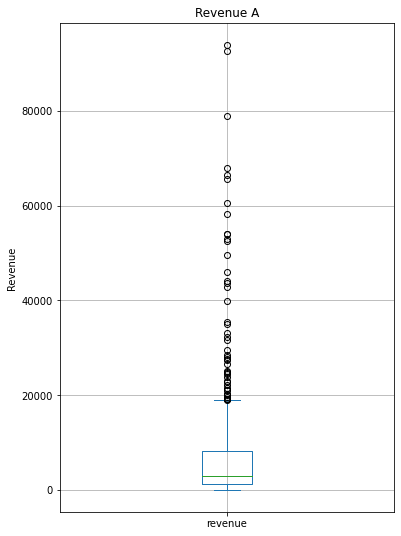

In [23]:
orders[orders['group']=='A'].plot(kind='box', y='revenue', grid=True, figsize=(6,9), title='Revenue A')
plt.ylabel('Revenue')
plt.show()

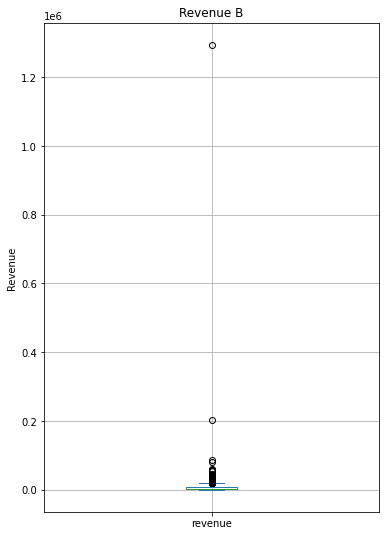

In [24]:
orders[orders['group']=='B'].plot(kind='box', y='revenue', grid=True, figsize=(6,9), title='Revenue B')
plt.ylabel('Revenue')
plt.show()

We have outliers in both groups. The outlier in group B obviously pushes the average up a lot.

In [25]:
orders['date'].describe(datetime_is_numeric=True)

count                             1197
mean     2019-08-15 13:06:46.015037696
min                2019-08-01 00:00:00
25%                2019-08-08 00:00:00
50%                2019-08-15 00:00:00
75%                2019-08-23 00:00:00
max                2019-08-31 00:00:00
Name: date, dtype: object

Let's check the number of entries for each group.

In [26]:
visitors['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

In [27]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

<b>Results:</b> Visits and orders data are for August 2019. Visits: an average of 600 visits per day. Both groups have a left-skewed distribution. In terms of revenue, there are clearly outliers in both groups - we leave them for now.

### Stage 2.  A/B-test

#### A graph of cumulative revenue by group

A table of unique pairs of date values and test groups from orders

In [28]:
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Getting aggregated cumulative data on orders by day

In [29]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


Getting aggregated cumulative daily data about online store visitors

In [30]:
visitorsAggregated = (datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
                     )
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Combining cumulative data in one table

In [31]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head(5) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Dataframes with cumulative number of orders and cumulative revenue by day in group A and B

In [32]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueA.head()

,date,revenue,orders
0,2019-08-01,148579,24
2,2019-08-02,242401,44
4,2019-08-03,354874,68
6,2019-08-04,425699,84
8,2019-08-05,549917,109


In [33]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
cumulativeRevenueB.head()

,date,revenue,orders
1,2019-08-01,101217,21
3,2019-08-02,266748,45
5,2019-08-03,380996,61
7,2019-08-04,489567,78
9,2019-08-05,581995,101


Revenue on a plot

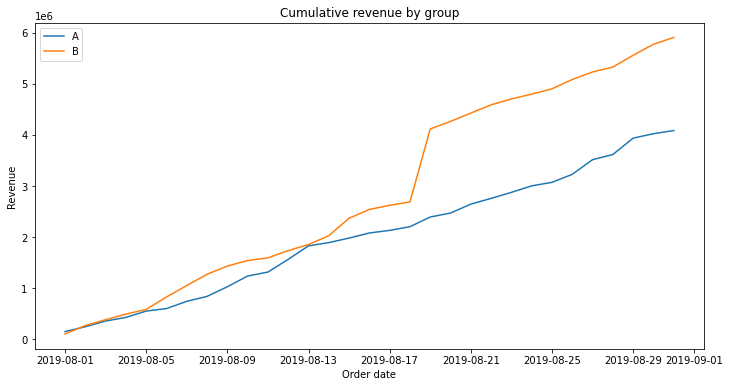

In [34]:
plt.figure(figsize=(12,6))
plt.title('Cumulative revenue by group')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Order date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

In group B, revenue is almost always higher, except for the initial period until 08/05/2019. We see a sharp rise around 08/19/2019 - probably an outlier.

#### Cumulative average bill by groups

We divide the cumulative revenue by the cumulative number of orders:

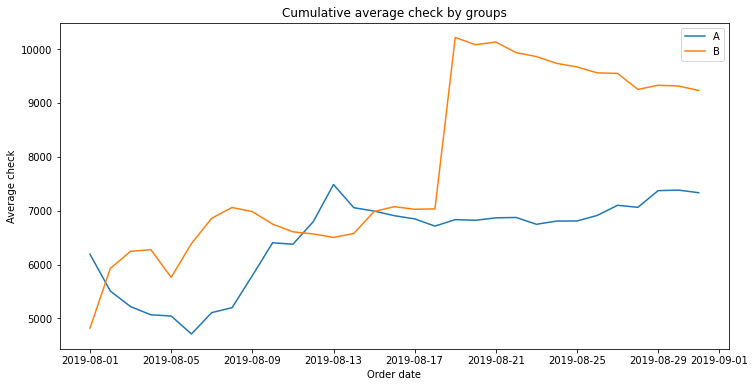

In [35]:
plt.figure(figsize=(12,6))
plt.title('Cumulative average check by groups')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xlabel('Order date')
plt.ylabel('Average check')
plt.show()

In group B, the average check is almost always higher, except for the very beginning and a few days in the middle of the month. We see a sharp rise around 08/19/2019, which can be an outlier

#### Let's plot the relative change in the cumulative average check of group B to group A.

Collecting data in one dataframe

In [36]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on='date', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


Let's plot the ratio of average checks and add the X axis

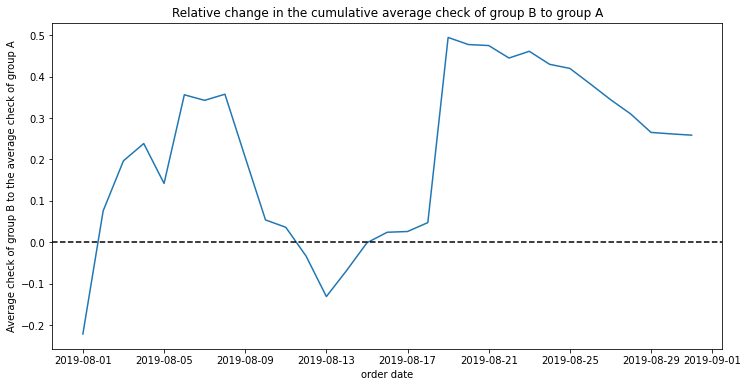

In [37]:
plt.figure(figsize=(12,6))
plt.title('Relative change in the cumulative average check of group B to group A')
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('order date')
plt.ylabel('Average check of group B to the average check of group A')
plt.show()

In group B, revenue is almost always higher, except at the very beginning and a few days in the middle of the month. We see a sharp rise on 08/19/2019, which can be an outlier

#### Cumulative conversion by group

Cumulative conversion = cumulative orders / cumulative visitors

In [38]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856


Let's split the data into groups

In [39]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataA.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
2,2019-08-02,A,44,38,242401,1338,0.032885
4,2019-08-03,A,68,62,354874,1845,0.036856
6,2019-08-04,A,84,77,425699,2562,0.032787
8,2019-08-05,A,109,100,549917,3318,0.032851


In [40]:
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
cumulativeDataB.head()

,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,21,20,101217,713,0.029453
3,2019-08-02,B,45,43,266748,1294,0.034776
5,2019-08-03,B,61,59,380996,1803,0.033833
7,2019-08-04,B,78,75,489567,2573,0.030315
9,2019-08-05,B,101,98,581995,3280,0.030793


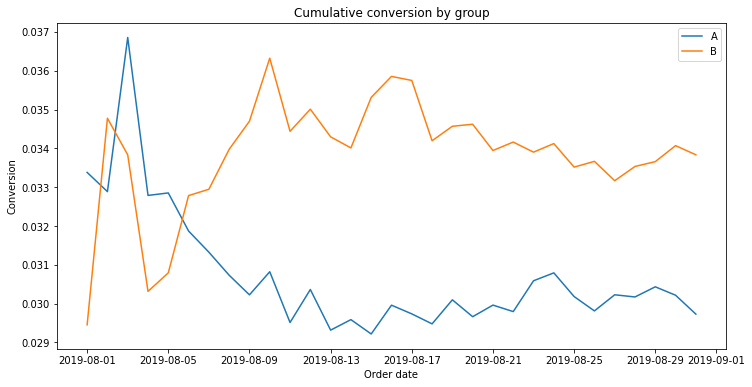

In [41]:
plt.figure(figsize=(12,6))
plt.title('Cumulative conversion by group')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xlabel('Order date')
plt.ylabel('Conversion')
plt.show()

In group B, the conversion has been steadily higher since about 07/08/2019

#### Relative change in the cumulative conversion of group B to group A

Let's merge the conversions of two groups by date

In [42]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], on='date', suffixes=['A', 'B'])
mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


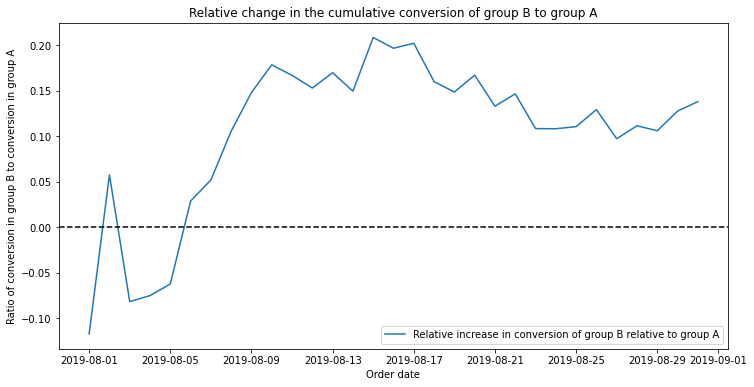

In [43]:
plt.figure(figsize=(12,6))
plt.title('Relative change in the cumulative conversion of group B to group A')
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Relative increase in conversion of group B relative to group A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Order date')
plt.ylabel('Ratio of conversion in group B to conversion in group A')
plt.show()

Group B conversion was steadily higher since about 08/07/2019

#### A scatter plot of the number of orders by users

Let's count the number of orders per user (among users who ordered)

In [44]:
ordersByUsers = orders.groupby('visitorId')['transactionId'].nunique().reset_index()
ordersByUsers.columns = ['visitorId', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head()

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


We build a scatter plot whose x range of numbers is from 0 to the total number of visitors

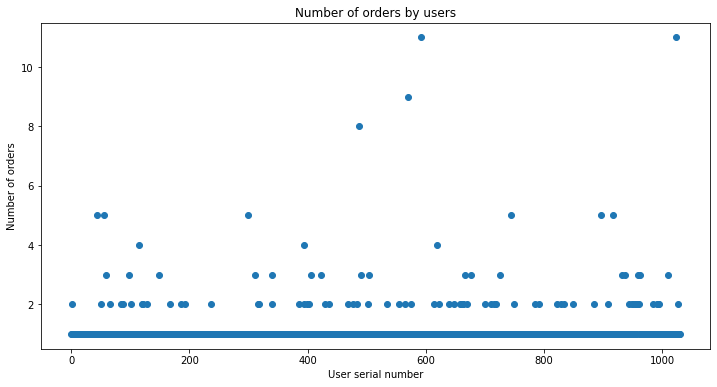

In [45]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(12,6))
plt.title('Number of orders by users')
plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel('User serial number')
plt.ylabel('Number of orders')
plt.show()

Let's look at the distribution

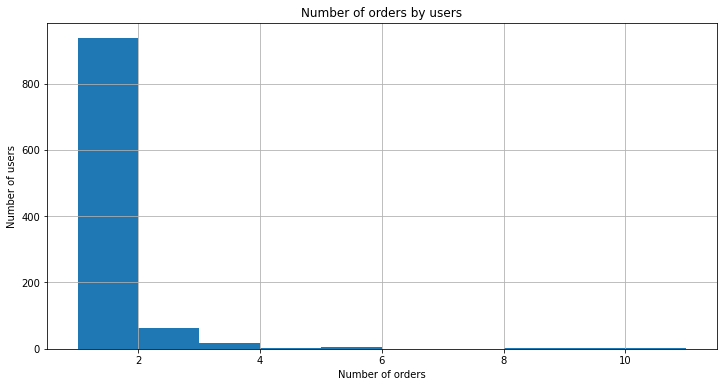

In [46]:
ordersByUsers['orders'].hist(bins=10, figsize=(12,6))
plt.title('Number of orders by users')
plt.xlabel('Number of orders')
plt.ylabel('Number of users')
plt.show()

Most visitors order one order at a time, much less often 2 orders. Orders over 2 are rare.

#### The 95th and 99th percentiles of orders per user. Choosing cut-off.

In [47]:
np.percentile(ordersByUsers['orders'], [95, 99]) 

array([2., 4.])

Let's trim at the 95th percentile, i.e. we will remove visitors with orders above 2.

#### A scatter plot of order costs

We build a scatter plot whose x range of numbers is from 0 to the total number of orders

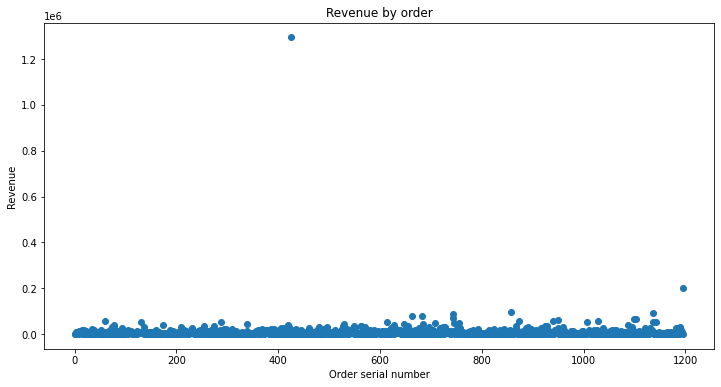

In [48]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(12,6))
plt.title('Revenue by order')
plt.scatter(x_values, orders['revenue']) 
plt.xlabel('Order serial number')
plt.ylabel('Revenue')
plt.show()

Let's use ylim to remove the two biggest outliers

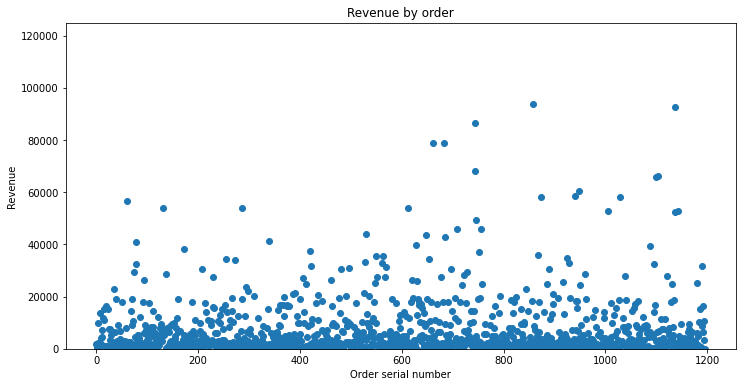

In [49]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(12,6))
plt.ylim([-0, 125000])
plt.title('Revenue by order')
plt.scatter(x_values, orders['revenue']) 
plt.xlabel('Order serial number')
plt.ylabel('Revenue')
plt.show()

There are outliers that are better visible on the boxplot (the graph is above in Stage 1)

#### The 95th and 99th percentiles of order value. Choosing cut-off.

In [50]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Let's trim at the 95th percentile, i.e. we will remove visitors with orders worth more than 28,000.

#### Statistical significance of differences in conversion between groups based on raw data.

Let's create a table, where we will combine visitors, orders, conversion by day and cumulative conversion.
From the visitors table we take the number of visitors per day for each group.

In [51]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsADaily.head()

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [52]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBDaily.head()

,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


We calculate the number of visitors as a cumulative total for each group separately

In [53]:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [54]:
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
visitorsBCummulative.head()

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


From the orders table, we count the number of orders and the amount of revenue for each date for two groups separately

In [55]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersADaily.head()

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


In [56]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
ordersBDaily.head()

,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,21,101217
1,2019-08-02,24,165531
2,2019-08-03,16,114248
3,2019-08-04,17,108571
4,2019-08-05,23,92428


We calculate the number of orders and revenue as a cumulative total by day for each group

In [57]:
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [58]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
ordersBCummulative.head()

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


We combine in one table: orders, revenue and the number of visitors by day and cumulative total for group A and group B

In [59]:
data = (
    ordersADaily.merge(ordersBDaily, on='date')
    .merge(ordersACummulative, on='date')
    .merge(ordersBCummulative, on='date')
    .merge(visitorsADaily, on='date')
    .merge(visitorsBDaily, on='date')
    .merge(visitorsACummulative, on='date')
    .merge(visitorsBCummulative, on='date')
)
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


From the orders table for users who ordered at least 1 time, we find the number of completed orders for groups A and B separately

In [60]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersA.head()

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [61]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']
ordersByUsersA.head()

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


Let's declare the variables sampleA and sampleB, in which the number of orders will correspond to users from different groups. Those who did not order anything will be matched with zeros.

In [62]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleA.sort_values(ascending=False)

499      7
278      5
227      5
23       4
18       4
        ..
6082     0
6083     0
6084     0
6085     0
18232    0
Name: orders, Length: 18736, dtype: int64

In [63]:
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
sampleB.sort_values(ascending=False)

340      6
326      5
424      4
514      4
580      4
        ..
6114     0
6115     0
6116     0
6117     0
18329    0
Name: orders, Length: 18916, dtype: int64

The number of elements of sampleA is the number of users, the sum of all elements is the number of orders. Conversion = amount of orders / number of users - i.e. we can use mean() to calculate the conversion. Let's calculate the increase in conversion in group B relative to group A.

In [64]:
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.138


Our distribution is non-normal and there are outliers. Therefore, to compare two samples, we use the nonparametric Mann-Whitney U-test. Null hypothesis - conversions in groups A and B are equal. The alternative hypothesis is that conversions in groups A and B are not equal.
We set the critical level of statistical significance equal to 0.05.

In [65]:
alpha = .05
results = st.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis: the difference is statistically significant")
else:
    print("Cannot reject the null hypothesis")

p-value:  0.016792355056752608
We reject the null hypothesis: the difference is statistically significant


<b>Results:</b>
<br>
In group B, the conversion is higher by 13.8%, the difference is statistically significant.

#### Statistical significance of the differences in the average order revenue between the groups on raw data.

Let's calculate the difference between groups in terms of average revenue.

In [66]:
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.259


Our distribution is non-normal and there are outliers. Therefore, to compare two samples, we use the nonparametric Mann-Whitney U-test. Null hypothesis - the average revenue in groups A and B are equal. An alternative hypothesis is that the average revenue in groups A and B are not equal. We set the critical level of statistical significance equal to 0.05.

In [67]:
alpha = .05
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis: the difference is statistically significant")
else:
    print("Cannot reject null hypothesis, there is no significant difference")

p-value:  0.7292909855432458
Cannot reject null hypothesis, there is no significant difference


<b>Results:</b>
<br>
In group B, the average check is higher by 25.9%, but the difference is not statistically significant. It's probably due to outliers.

#### Statistical significance of the differences in the average order revenue between the groups on fixed data.

Let's determine the users to exclude (we will cut off the number of orders and revenue at the 95th percentile)

In [68]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers

1099     148427295
18       199603092
928      204675465
23       237748145
37       249864742
           ...    
723     4009017467
627     4120364173
743     4133034833
499     4256040402
662     4266935830
Length: 74, dtype: int64

In [69]:
abnormalUsers.shape

(74,)

In [70]:
abnormalUsers.shape[0] / orders['visitorId'].nunique()

0.07177497575169738

It turns out we exclude 74 users (7% of the number of users)

Let's prepare samples of the number of orders by users by test groups

In [71]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleAFiltered

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18690, dtype: int64

In [72]:
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleBFiltered

0        1
1        1
2        1
3        1
4        1
        ..
18325    0
18326    0
18327    0
18328    0
18329    0
Name: orders, Length: 18869, dtype: int64

We can use mean() to calculate the conversion. We will calculate the increase in conversion in group B relative to group A

In [73]:
print("{0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

0.173


To compare two samples, we use the same nonparametric Mann-Whitney U-test. Null hypothesis: conversions in groups A and B are equal. The alternative hypothesis is that conversions in groups A and B are not equal.
The critical level of statistical significance is 0.05.

In [74]:
alpha = .05
results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis: the difference is statistically significant")
else:
    print("Cannot reject null hypothesis, no significant difference can be detected")

p-value:  0.013042592743036745
We reject the null hypothesis: the difference is statistically significant


<b>Results:</b>
<br>
The difference in conversion increased from 13.8% to 17.3%, the difference is statistically significant, moreover p decreased from 0.017 to 0.013.

#### Statistical significance of the differences in the average order revenue between the groups on fixed data.

Let's calculate by what percentage in group B the average revenue differs from group A

In [75]:
print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

-0.020


To compare two samples, we use a nonparametric U-test. Null hypothesis: the average revenue in groups A and B are equal. An alternative hypothesis is that the average revenue in groups A and B are not equal. The critical level of statistical significance is 0.05.

In [76]:
alpha = .05
results = st.mannwhitneyu(orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'], orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'], alternative = 'two-sided')
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis: the difference is statistically significant")
else:
    print("Cannot reject null hypothesis, no significant difference was found")

p-value:  1.0
Cannot reject null hypothesis, no significant difference was found


<b>Results:</b>
<br>
After removing the outliers, the differences in the average revenue between the groups changed sign. Before: 25% higher in group B; now: 2% lower in group B. The difference is statistically insignificant.

### Decision based on test results

We got a statistically significant increase in conversion by 17% in group B relative to group A, so it is advisable to stop the test and fix the increase in conversion and no increase in the average revenue.

## Conclusion

1. Based on the results of hypotheses prioritization using ICE and RICE methods, the following hypothesis was chosen: "Add a subscription form to all main pages to collect a customer base for email newsletters"
2. Based on the results of the A/B test analysis, it is recommended to fix the result: a statistically significant increase in conversion by 17% in group B relative to group A and no difference in the average revenue and stop the test.

<b>Details:</b><br>

Prioritization of 8 hypotheses was carried out using two methods ICE and RICE. According to ICE, the highest priority hypothesis is: "Run a promotion that gives a discount on a product on a birthday." According to the RICE framework due to the maximum reach score (Reach) - "Add a subscription form to all main pages to collect a customer base for email newsletters." Because coverage is important for us, we decided to start with a hypothesis: "Add a subscription form to all main pages in order to collect a customer base for email newsletters"


We analyzed the data on visits and orders for August 2019, prepared for the A / B test:
1. For most of the reporting period, the cumulative revenue and average check are higher in group B, however, there are outliers that affect the result of the comparison.
2. Cumulative conversion in group B is consistently higher than in group A
3. To determine the statistical significance of differences between groups in conversion and average check, a two-sided Mann–Whitney U test was performed: in group B, the conversion was increased by 13.8%, the difference is statistically significant. In group B, the average check is higher by 25.9%, but the difference is not statistically significant.
4. In order to clean up the data, outliers were excluded: visitors with the number of orders or order value over the 95th percentile (more than 2 orders and more than 28,000, respectively) and conducted a repeated two-sided Mann–Whitney U test: the difference in conversion increased from 13.8% to 17.3%, the difference statistically significant, moreover, p decreased from 0.017 to 0.013; differences in the average check between groups decreased and changed sign (from 25% to -2%), the difference is not statistically significant.